In [1]:
import os
import numpy as np
import pandas as pd

# 设定utils_data目录路径，假设脚本与utils_data在同一目录下
utils_data_path = 'utils_data'
datasets = ["chameleon", "cornell", "deezer-europe", "pokec", "snap-patents", "squirrel", "texas", "wisconsin", "yelp-chi"]
models = ["GCN", "mlp"]

# 初始化空的DataFrame
accuracy_df = pd.DataFrame(index=models, columns=datasets)

# 遍历utils_data目录下的每个子文件夹
for subdir in os.listdir(utils_data_path):
    # 检查是否为文件夹
    if os.path.isdir(os.path.join(utils_data_path, subdir)):
        # 提取模型和数据集名称
        model_name, dataset_name = subdir.split('_')
        # 仅处理指定的模型和数据集
        if model_name in models and dataset_name in datasets:
            # 构建final_accuracy.npy文件的完整路径
            final_accuracy_path = os.path.join(utils_data_path, subdir, 'final_accuracy.npy')
            # 读取final_accuracy.npy文件
            final_accuracy = np.load(final_accuracy_path)
            # 将读取到的精度数据存储到DataFrame中
            accuracy_df.at[model_name, dataset_name] = final_accuracy.item()  # Assuming it's a single number

# 输出结果
print(accuracy_df)


    chameleon   cornell deezer-europe     pokec snap-patents  squirrel  \
GCN  0.334783  0.439024      0.589302  0.602546      0.35133   0.26341   
mlp  0.469565  0.658537      0.683681  0.556154     0.293488  0.268199   

        texas wisconsin  yelp-chi  
GCN  0.390244  0.425926  0.568948  
mlp  0.658537  0.666667   0.75234  


In [ ]:
import numpy as np 
import os 
utils_data_pt = './utils_data/1stage_ourModel_twitch-e_True'
loss_list = np.load(os.path.join(utils_data_pt, 'loss.npy'))
# acc_list = np.load(os.path.join(utils_data_pt, 'acc.npy'))
val_acc_list = np.load(os.path.join(utils_data_pt, 'val_acc.npy'))
add_num_list = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
pseudo_loss_list = np.load(os.path.join(utils_data_pt, 'pseudo_loss.npy'))
final_acc = np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))
pseudolabel_num = np.load(os.path.join(utils_data_pt, 'pseudolabel_num.npy'))
print(f'Final_accuracy:{final_acc[0]}')

In [4]:
import numpy as np 
np.sum(np.array([0,0,0,1]) == 1)

1

In [ ]:
import matplotlib.pyplot as plt
lines = []
fig, ax1 = plt.subplots()
lines.append(ax1.plot(np.arange(len(loss_list)), loss_list[:,0], label='groudtruth_loss')[0])
lines.append(ax1.plot(np.arange(len(loss_list)), loss_list[:,1], label='autoencoder_loss')[0])
lines.append(ax1.plot(np.arange(len(pseudo_loss_list)), pseudo_loss_list, label='pseudo_loss')[0])
# ax1.legend()

# ax2 = ax1.twinx()
# lines.append(ax2.plot(np.arange(len(pseudolabel_num)), pseudolabel_num, label='pseudolabel_num', color='black')[0])
# ax2.legend()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

In [ ]:
fig, ax1 = plt.subplots()
lines.append(ax1.plot(np.arange(len(loss_list)), val_acc_list, label='val_acc')[0])
lines.append(ax1.plot(np.arange(len(acc_list)), acc_list, label='accuracy')[0])
ax1.legend()

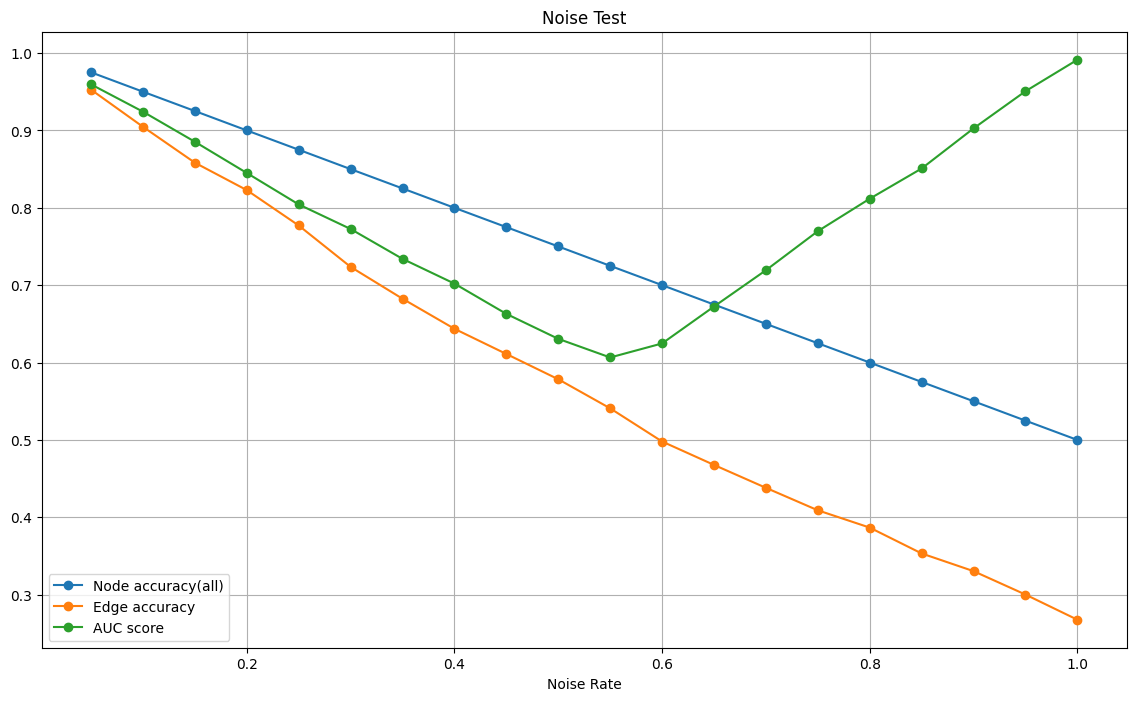

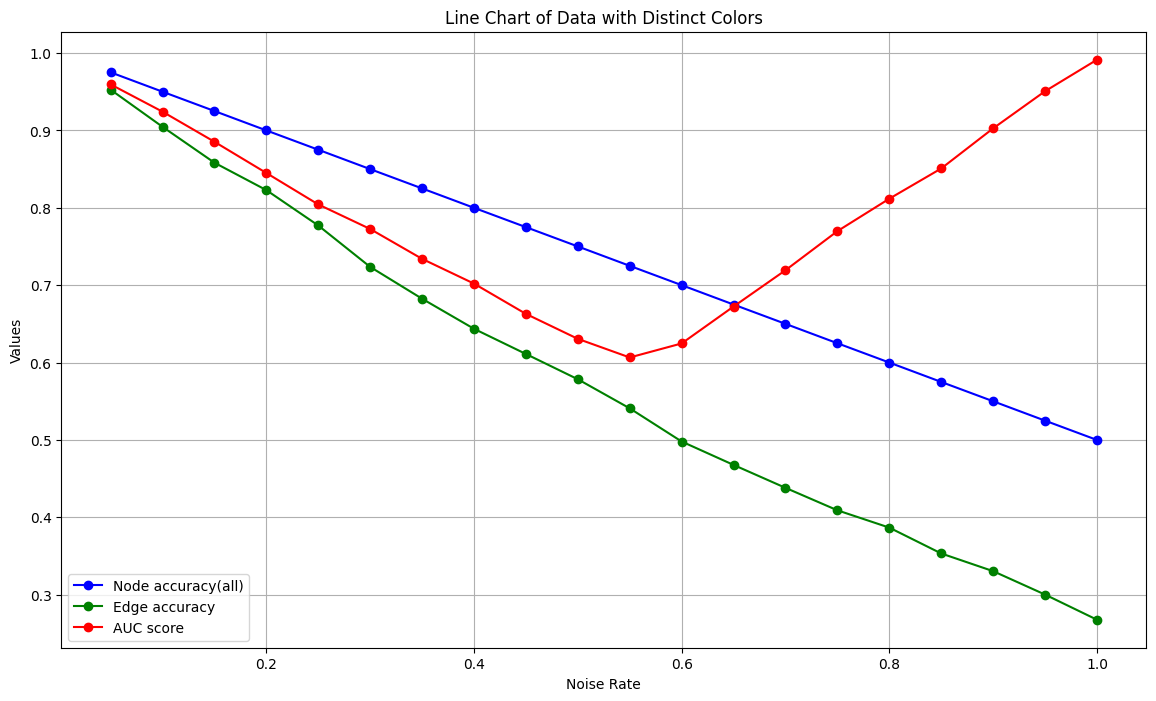

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Provided data
data = {
    "noise_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
    # "node_labels_pseudo_acc": [0.7829670310020447] * 20,
    "Node accuracy(all)": [0.9750474095344543, 0.9499894976615906, 0.9250368475914001, 0.8999789357185364, 0.8750263452529907, 
                                            0.849968433380127, 0.8250158429145813, 0.7999579310417175, 0.7750052809715271, 0.7500526905059814, 
                                            0.7249947786331177, 0.7000421285629272, 0.6749842166900635, 0.6500316262245178, 0.624973714351654, 
                                            0.6000210642814636, 0.5749631524085999, 0.5500105619430542, 0.5249526500701904, 0.5],
    "Edge accuracy": [0.9526439905166626, 0.9046480655670166, 0.8582585453987122, 0.8228394985198975, 0.7771291136741638, 
                 0.7236283421516418, 0.6824889779090881, 0.6436482071876526, 0.6111024022102356, 0.5784390568733215, 
                 0.5408520102500916, 0.4979887306690216, 0.4677480459213257, 0.43813422322273254, 0.40909504890441895, 
                 0.3867230713367462, 0.3533283770084381, 0.330466628074646, 0.30020633339881897, 0.2677127718925476],
    "AUC score": [0.9594590770440627, 0.924192145461478, 0.8853119116841026, 0.8449847186807425, 0.8043484736553632, 
                              0.7725980327907919, 0.7340093504992493, 0.7020213491647405, 0.6629091401949336, 0.6306671949098015, 
                              0.6065823612468126, 0.624708820866001, 0.672411186640612, 0.7193074106951363, 0.7698053940376045, 
                              0.8117255081857826, 0.850787449658032, 0.902612494936015, 0.9506142315849677, 0.9913253193289326]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting the data using line plots
plt.figure(figsize=(14, 8))

# Loop through the columns to plot them, except the first one which is for the x-axis
for column in df.columns[1:]:
    plt.plot(df["noise_rate"], df[column], marker='o', label=column)

plt.title('Noise Test')
plt.xlabel('Noise Rate')
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()


# Plotting the data with distinct colors for each line
colors = ['blue', 'green', 'red', 'purple']  # Colors for the lines

plt.figure(figsize=(14, 8))

# Loop through the columns to plot them with different colors, except the first one which is for the x-axis
for i, column in enumerate(df.columns[1:]):
    plt.plot(df["noise_rate"], df[column], marker='o', color=colors[i], label=column)

plt.title('Line Chart of Data with Distinct Colors')
plt.xlabel('Noise Rate')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


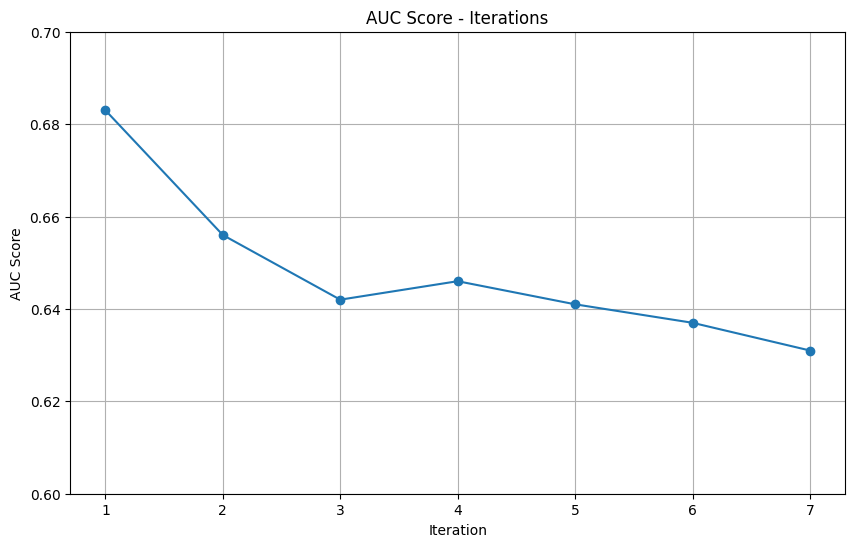

In [3]:
import matplotlib.pyplot as plt

# AUC scores provided
auc_scores = [0.683, 0.656, 0.642, 0.646, 0.641, 0.637, 0.631]

# Iterations (assuming each score corresponds to an iteration, starting from 1)
iterations = list(range(1, len(auc_scores) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, auc_scores, marker='o')
plt.title("AUC Score - Iterations")
plt.xlabel("Iteration")
plt.ylabel("AUC Score")
plt.grid(True)
plt.xticks(iterations)
plt.ylim(0.6, 0.7)  # Adjusting y-axis limits for better visualization
plt.show()


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os 

utils_data_pt = './utils_data/3_stage_ourModel_twitch-e_True'
loss_list = np.load(os.path.join(utils_data_pt, 'loss.npy'))
metric_list = np.load(os.path.join(utils_data_pt, 'metric.npy'))
val_metric_list = np.load(os.path.join(utils_data_pt, 'val_metric.npy'))
add_num_list = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
test_metric_list = np.load(os.path.join(utils_data_pt, 'test_metric.npy'))
pseudo_loss_list = np.load(os.path.join(utils_data_pt, 'pseudo_loss.npy'))
final_acc = np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))
pseudolabel_num = np.load(os.path.join(utils_data_pt, 'pseudolabel_num.npy'))
best_val_metric_list = np.load(os.path.join(utils_data_pt, 'best_val_metric_list.npy'))
threshold_accuracy_list = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
edge_status_list = np.load(os.path.join(utils_data_pt, 'edge_status.npy'))
print(f'Final metric:{final_acc[0]}')

Final metric:0.6988840892728582


In [20]:
utils_data_pt = './utils_data/2_stage_ourModel_twitch-e_True'
threshold_accuracy_list_2 = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_2 = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

utils_data_pt = './utils_data/3_stage_inherit_ourModel_twitch-e_True'
threshold_accuracy_list_3_inherit = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_3_inherit = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

utils_data_pt = './utils_data/3_stage_non-inherit_ourModel_twitch-e_True'
threshold_accuracy_list_3_non_inherit = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_3_non_inherit = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

0.6965204274341283
0.6983351890854943
0.7009436760587104


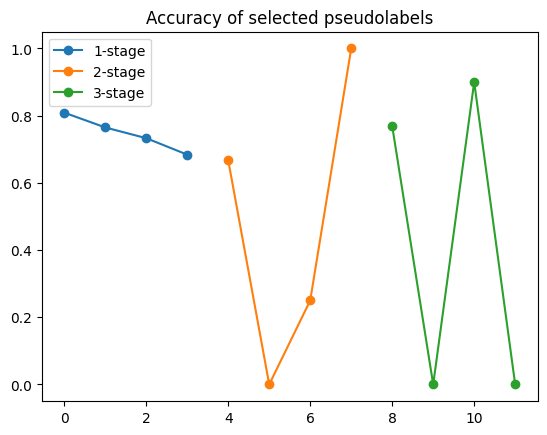

In [2]:
plt.title('Accuracy of selected pseudolabels')
# threshold_accuracy_list[np.where(np.isnan(threshold_accuracy_list))[0]] = 0
threshold_accuracy_list = [0.809, 0.765, 0.733, 0.684, 0.667, 0, 0.25, 1, 0.769, 0, 0.9, 0]
plt.plot(np.arange(len(threshold_accuracy_list[:4])), threshold_accuracy_list[:4], 'o-', label='1-stage')
plt.plot(np.arange(len(threshold_accuracy_list[4:8]))+4, threshold_accuracy_list[4:8], 'o-', label='2-stage')
plt.plot(np.arange(len(threshold_accuracy_list[8:12]))+8, threshold_accuracy_list[8:12], 'o-', label='3-stage')
# plt.plot(np.arange(len(threshold_accuracy_list_2)), threshold_accuracy_list_2, 'o-', label='2-stage')
# plt.plot(np.arange(len(threshold_accuracy_list_3_inherit)), threshold_accuracy_list_3_inherit, 'o-', label='3-stage-inherit')
# plt.plot(np.arange(len(threshold_accuracy_list_3_non_inherit)), threshold_accuracy_list_3_non_inherit, 'o-', label='3-stage-non-inhertit')
plt.legend()

In [3]:
edge_status_list

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2])

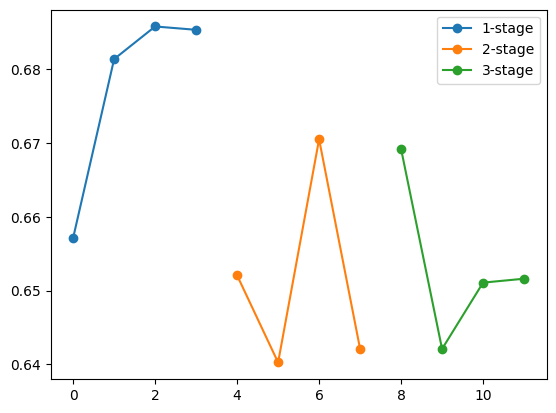

In [4]:
add_num_list = [256, 412, 303, 95, 42, 0, 4, 1, 13, 0, 10, 0]
plt.plot(np.arange(len(best_val_metric_list[:4])), best_val_metric_list[:4],  'o-', label='1-stage')
plt.plot(np.arange(len(best_val_metric_list[4:8]))+4, best_val_metric_list[4:8], 'o-', label='2-stage')
plt.plot(np.arange(len(best_val_metric_list[8:12]))+8, best_val_metric_list[8:12], 'o-', label='3-stage')
plt.legend()

[0.78104573 0.74147731 0.69543147 0.68421054 0.74025977 0.
 0.25       0.625      0.74248928 1.         0.69421482 1.        ]
[256, 412, 303, 95, 42, 0, 4, 1, 13, 0, 10, 0]


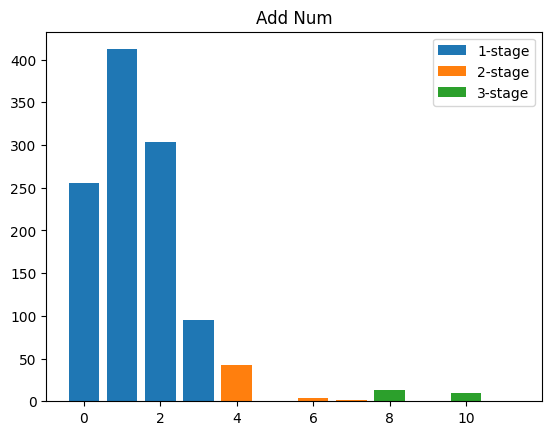

In [21]:
plt.title('Add Num')
add_num_list = [256, 412, 303, 95, 42, 0, 4, 1, 13, 0, 10, 0]
plt.bar(np.arange(len(add_num_list[:4])), add_num_list[:4],  label='1-stage')
plt.bar(np.arange(len(add_num_list[4:8]))+4, add_num_list[4:8],  label='2-stage')
plt.bar(np.arange(len(add_num_list[8:12]))+8, add_num_list[8:12],  label='3-stage')
plt.legend()
print(threshold_accuracy_list)
print(add_num_list)
# edge_status_list

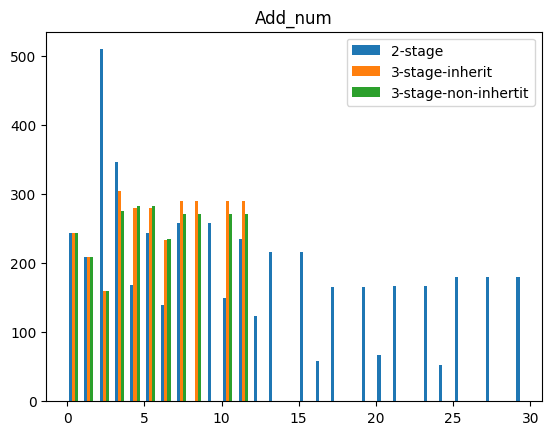

In [40]:
plt.title('Add_num')
width = 0.2
# plt.bar(np.arange(len(add_num_list[1:])), add_num_list[1:], width=width, label='1-stage')
plt.bar(np.arange(len(add_num_list_2[1:]))+width, add_num_list_2[1:], width=width, label='2-stage')
plt.bar(np.arange(len(add_num_list_3_inherit[1:]))+2*width, add_num_list_3_inherit[1:], width=width, label='3-stage-inherit')
plt.bar(np.arange(len(add_num_list_3_non_inherit[1:]))+3*width, add_num_list_3_non_inherit[1:], width=width, label='3-stage-non-inhertit')
plt.legend()

In [8]:
print(val_metric_list)

[0.5        0.5        0.5        ... 0.64696358 0.64676367 0.64661613]


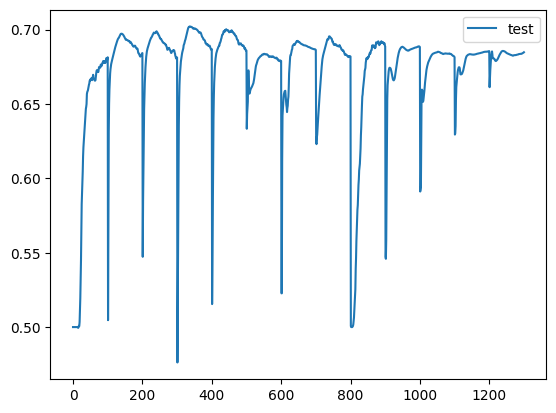

In [7]:
# plt.plot(np.arange(len(loss_list)), loss_list[:,0], label='groudtruth_loss')
# plt.plot(np.arange(len(loss_list)), loss_list[:,1], label='autoencoder_loss')
# plt.plot(np.arange(len(loss_list)), [0,]*101 + list(pseudo_loss_list), label='pseudo_loss')

# plt.plot(np.arange(len(loss_list)), val_metric_list, label='val')
plt.plot(np.arange(len(loss_list)), test_metric_list, label='test')

plt.legend()

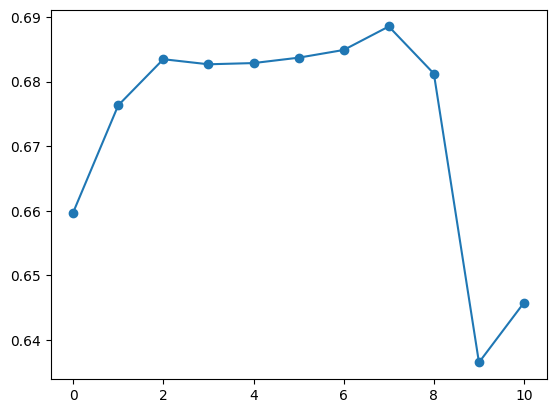

In [14]:
plt.plot(np.arange(len(best_val_metric_list)), best_val_metric_list, 'o-', label='best_val_metric')

In [15]:
edge_status_list

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2])

In [25]:
loss_list[:,1][100:200]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])